<a href="https://colab.research.google.com/github/ToluGb/Hamoye-DSI-2020/blob/master/HSDC_Stage_C_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

In [64]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [66]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [67]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [68]:
X = df.drop(columns=['stab', 'stabf'])
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [69]:
y = df['stabf']
y.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [70]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Random Forest Classifier**

In [72]:
from sklearn.ensemble import RandomForestClassifier
Rand = RandomForestClassifier(random_state=1)
Rand.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [73]:
y_pred = Rand.predict(X_test)

In [74]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
# Confusion Matrix
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_mat

array([[ 625,   87],
       [  55, 1233]])

In [75]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(acc*100), 2))

Accuracy: 93.0


In [76]:
# Precision
prec = precision_score(y_test, y_pred, pos_label='unstable')
print('Precision: {}'.format(round(prec*100), 2))

Precision: 93.0


In [77]:
# Recall
rec = recall_score(y_test, y_pred, pos_label='unstable')
print('Recall: {}'.format(round(rec*100), 2))

Recall: 96.0


In [78]:
# F1-Score
f1 = f1_score(y_test, y_pred, pos_label='unstable')
print('F1: {}'.format(round(f1*100), 2)) 

F1: 95.0


In [79]:
model_results = pd.DataFrame([['RandomForest', acc, prec, rec, f1]], columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

Question 14: 
Accuracy of Random Forest

In [80]:
model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForest,0.929,0.934091,0.957298,0.945552


**Extra Trees Classifier**

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(random_state=1)
ETC.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [82]:
y_pred = ETC.predict(X_test)

In [83]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
# Confusion Matrix
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_mat

array([[ 606,  106],
       [  38, 1250]])

In [84]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(acc*100), 2))

Accuracy: 93.0


In [85]:
# Precision
prec = precision_score(y_test, y_pred, pos_label='unstable')
print('Precision: {}'.format(round(prec*100), 2))

Precision: 92.0


In [86]:
# Recall
rec = recall_score(y_test, y_pred, pos_label='unstable')
print('Recall: {}'.format(round(rec*100), 2))

Recall: 97.0


In [87]:
# F1-Score
f1 = f1_score(y_test, y_pred, pos_label='unstable')
print('F1: {}'.format(round(f1*100), 2)) 

F1: 95.0


In [88]:
results_1 = pd.DataFrame([['Extra Trees', acc, prec, rec, f1]], columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_1

,Model,Accuracy,Precision,Recall,F1-Score
0,Extra Trees,0.928,0.921829,0.970497,0.945537


In [89]:
model_results = model_results.append(results_1, ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForest,0.929,0.934091,0.957298,0.945552
1,Extra Trees,0.928,0.921829,0.970497,0.945537


**XGBoost Classifier**

In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
y_pred = xgb.predict(X_test)

In [92]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_mat

array([[ 603,  109],
       [  52, 1236]])

In [93]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(acc*100), 2))

Accuracy: 92.0


In [94]:
# Precision
prec = precision_score(y_test, y_pred, pos_label='unstable')
print('Precision: {}'.format(round(prec*100), 2))

Precision: 92.0


In [95]:
# Recall
rec = recall_score(y_test, y_pred, pos_label='unstable')
print('Recall: {}'.format(round(rec*100), 2))

Recall: 96.0


In [96]:
# F1-Score
f1 = f1_score(y_test, y_pred, pos_label='unstable')
print('F1: {}'.format(round(f1*100), 2)) 

F1: 94.0


Question 15: Accuracy of XGBoost Classifier

In [97]:
results_2 = pd.DataFrame([['XGBoost', acc, prec, rec, f1]], columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_2

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.9195,0.918959,0.959627,0.938853


In [98]:
model_results = model_results.append(results_2, ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForest,0.9290,0.934091,0.957298,0.945552
1,Extra Trees,0.9280,0.921829,0.970497,0.945537
2,XGBoost,0.9195,0.918959,0.959627,0.938853


**Lightgbm Classifier**

In [99]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [100]:
y_pred = lgbm.predict(X_test)

In [101]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_mat

array([[ 635,   77],
       [  48, 1240]])

In [102]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(acc*100), 2))

Accuracy: 94.0


In [103]:
# Precision
prec = precision_score(y_test, y_pred, pos_label='unstable')
print('Precision: {}'.format(round(prec*100), 2))

Precision: 94.0


In [104]:
# Recall
rec = recall_score(y_test, y_pred, pos_label='unstable')
print('Recall: {}'.format(round(rec*100), 2))

Recall: 96.0


In [105]:
# F1-Score
f1 = f1_score(y_test, y_pred, pos_label='unstable')
print('F1: {}'.format(round(f1*100), 2)) 

F1: 95.0


Question 16: Accuracy of LGBM Classifier

In [106]:
results_3 = pd.DataFrame([['Lightgbm', acc, prec, rec, f1]], columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_3

,Model,Accuracy,Precision,Recall,F1-Score
0,Lightgbm,0.9375,0.941534,0.962733,0.952015


In [107]:
model_results = model_results.append(results_3, ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForest,0.9290,0.934091,0.957298,0.945552
1,Extra Trees,0.9280,0.921829,0.970497,0.945537
2,XGBoost,0.9195,0.918959,0.959627,0.938853
3,Lightgbm,0.9375,0.941534,0.962733,0.952015


**Randomized Cross-Validation Search**

In [108]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [109]:
clf = RandomizedSearchCV(ExtraTreesClassifier(random_state=1), hyperparameter_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

Question 17: Best Hyperparameters of Randomized Search CV

In [110]:
clf_best_parameters = clf.best_params_
clf_best_parameters

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [111]:
n_estimators = [1000]
min_samples_split = [2]
min_samples_leaf = [8]
max_features = [None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [112]:
clf = RandomizedSearchCV(ExtraTreesClassifier(random_state=1), hyperparameter_grid, random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                     

In [113]:
y_pred = clf.predict(X_test)

In [114]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_mat

array([[ 619,   93],
       [  53, 1235]])

In [115]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(acc*100), 2))

Accuracy: 93.0


In [116]:
# Precision
prec = precision_score(y_test, y_pred, pos_label='unstable')
print('Precision: {}'.format(round(prec*100), 2))

Precision: 93.0


In [117]:
# Recall
rec = recall_score(y_test, y_pred, pos_label='unstable')
print('Recall: {}'.format(round(rec*100), 2))

Recall: 96.0


In [118]:
# F1-Score
f1 = f1_score(y_test, y_pred, pos_label='unstable')
print('F1: {}'.format(round(f1*100), 2)) 

F1: 94.0


In [119]:
results_4 = pd.DataFrame([['Random Search CV', acc, prec, rec, f1]], columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_4

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Search CV,0.927,0.92997,0.958851,0.94419


Question 18: Comparing the Accuracies of Extra Trees and Random Search CV

In [120]:
model_results = model_results.append(results_4, ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForest,0.9290,0.934091,0.957298,0.945552
1,Extra Trees,0.9280,0.921829,0.970497,0.945537
2,XGBoost,0.9195,0.918959,0.959627,0.938853
3,Lightgbm,0.9375,0.941534,0.962733,0.952015
4,Random Search CV,0.9270,0.929970,0.958851,0.944190


Question 20

In [143]:
df2 = df.drop(columns=['stabf', 'stab'])
df2.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [141]:
feat_imp = pd.DataFrame(df2.columns, columns=['features'], index=np.arange(12))
feat_imp

,features
0,tau1
1,tau2
2,tau3
3,tau4
4,p1
5,p2
6,p3
7,p4
8,g1
9,g2


Feature: 0, Score: 0.11740
Feature: 1, Score: 0.11844
Feature: 2, Score: 0.11317
Feature: 3, Score: 0.11547
Feature: 4, Score: 0.03951
Feature: 5, Score: 0.04037
Feature: 6, Score: 0.04071
Feature: 7, Score: 0.04058
Feature: 8, Score: 0.08978
Feature: 9, Score: 0.09368
Feature: 10, Score: 0.09688
Feature: 11, Score: 0.09402


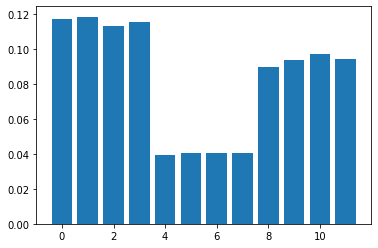

In [129]:
# get importance
importance = ETC.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()